In [1]:
import pandas as pd
import numpy as np

In [2]:
data_all = pd.read_excel('D:\\data\\挖掘运输热点数据\\6.29新的分类数据\\POI修订后新的结果\\stayregion_feature_train_all.xlsx',header=None)
data_all.head(2)

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,P000021035,0.240000,0.313333,0.200000,0.120000,0.02,0.026667,0.006667,0.013333,0.013333,...,0,0,0,3,0,22826.539964,0.465517,1.896552,0.293103,1
1,P000018732,0.117647,0.176471,0.176471,0.529412,0.00,0.000000,0.000000,0.000000,0.000000,...,0,1,0,4,0,1492.924291,0.733333,0.200000,0.466667,1


In [3]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Columns: 113 entries, 0 to 112
dtypes: float64(59), int64(52), object(2)
memory usage: 738.2+ KB


In [4]:
from sklearn.metrics import classification_report  #将主要分类指标以文本输出
from sklearn.metrics import confusion_matrix #计算混淆矩阵，主要来评估分类的准确性
from sklearn.metrics import accuracy_score #计算精度得分
from sklearn.linear_model import LogisticRegression #线性模型中的逻辑回归
from sklearn.tree import DecisionTreeClassifier #树算法中的决策树分类包
from sklearn.neighbors import KNeighborsClassifier #导入最近邻算法中的KNN最近邻分类包
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #判别分析算法中的线性判别分析包
from sklearn.naive_bayes import GaussianNB #朴素贝叶斯中的高斯朴素贝叶斯包
from sklearn.svm import SVC  #支持向量机算法中的支持向量分类包
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.exceptions import ChangedBehaviorWarning

## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore', category=ChangedBehaviorWarning)

In [6]:
# 查看数据
df = data_all
pd.set_option('display.max_columns', None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112
0,P000021035,0.240000,0.313333,0.200000,0.120000,0.020000,0.026667,0.006667,0.013333,0.013333,0.026667,0.006667,0.0,0.013333,4584.720000,2175.5,5.596790e+07,7481.169530,0.026667,0.033333,0.026667,0.026667,0.026667,0.040000,0.040000,0.046667,0.026667,0.046667,0.073333,0.053333,0.066667,0.046667,0.040000,0.073333,0.040000,0.053333,0.060000,0.046667,0.033333,0.020000,0.013333,0.040000,0.034483,0.034483,0.034483,0.086207,0.120690,0.068966,0.189655,0.086207,0.120690,0.068966,0.051724,0.103448,0.000000,1.000000,unclassified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,22826.539964,0.465517,1.896552,0.293103,1
1,P000018732,0.117647,0.176471,0.176471,0.529412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3114.529412,3600.0,1.803959e+06,1343.115435,0.000000,0.000000,0.176471,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.058824,0.058824,0.000000,0.235294,0.176471,0.000000,0.058824,0.000000,0.058824,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.066667,0.000000,0.466667,0.066667,0.000000,0.000000,1.000000,secondary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,4,11,3,0,2,0,1,0,4,0,1492.924291,0.733333,0.200000,0.466667,1
2,P000012504,0.193878,0.209184,0.352041,0.188776,0.025510,0.000000,0.005102,0.005102,0.000000,0.000000,0.000000,0.0,0.020408,3894.469388,2688.5,5.787606e+07,7607.631423,0.035714,0.025510,0.030612,0.056122,0.010204,0.025510,0.025510,0.045918,0.051020,0.056122,0.081633,0.066327,0.086735,0.045918,0.025510,0.051020,0.030612,0.040816,0.061224,0.015306,0.045918,0.040816,0.025510,0.020408,0.060606,0.068182,0.022727,0.242424,0.068182,0.030303,0.250000,0.045455,0.022727,0.121212,0.030303,0.037879,0.000000,1.000000,tertiary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,1,7,2,0,2,1,0,0,15,0,39269.641898,0.598485,0.810606,0.136364,1
3,P000014334,0.329260,0.335370,0.129667,0.161575,0.031908,0.008147,0.002716,0.001358,0.000000,0.000000,0.000000,0.0,0.000000,2487.724372,1670.0,5.275576e+06,2296.862314,0.031229,0.023761,0.031229,0.046164,0.035981,0.039375,0.050238,0.053632,0.037339,0.027155,0.013578,0.023082,0.084182,0.060421,0.057705,0.031229,0.025798,0.051595,0.093007,0.061100,0.045485,0.014257,0.030550,0.031908,0.150820,0.053552,0.028415,0.122404,0.045902,0.021858,0.192350,0.081967,0.039344,0.148634,0.085246,0.029508,0.001093,0.998907,tertiary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,24,0,56222.998172,0.537705,0.510383,0.834973,1
4,P000015111,0.365672,0.477612,0.134328,0.022388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1611.276119,1411.5,7.426041e+05,861.744823,0.029851,0.007463,0.014925,0.052239,0.014925,0.037313,0.067164,0.007463,0.074627,0.029851,0.029851,0.029851,0.223881,0.097015,0.014925,0.044776,0.014925,0.014925,0.074627,0.037313,0.022388,0.014925,0.029851,0.014925,0.125000,0.052083,0.000000,0.166667,0.031250,0.020833,0.281250,0.062500,0.041667,0.156250,0.052083,0.010417,0.000000,1.000000,secondary,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,11,0,2,0,2,0,0,0,1,5,20,6,0,6,0,0,0,41,0,6878.587426,0.385417,0.531250,0.708333,1


In [7]:
import numpy as np
#最大最小归一化
cols=[14,15,16,17,108]   # 可以改成自己需要的列的名字
for item in cols:
    max_tmp = np.max(np.array(df[item]))
    min_tmp = np.min(np.array(df[item]))
    if (max_tmp != min_tmp):
        df[item] = df[item].apply(lambda x: (x - min_tmp) / (max_tmp - min_tmp))
# 0-1标准化
# cols=list(df)   # 可以改成自己需要的列的名字
# for item in cols:
#     mean_tmp = np.mean(np.array(df[item]))
#     std_tmp = np.std(np.array(df[item]))
#     if(std_tmp):
#         df[item] = df[item].apply(lambda x: (x - mean_tmp) / std_tmp)

In [8]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112
0,P000021035,0.24,0.313333,0.2,0.12,0.02,0.026667,0.006667,0.013333,0.013333,0.026667,0.006667,0.0,0.013333,0.088733,0.033989,0.06182,0.248637,0.026667,0.033333,0.026667,0.026667,0.026667,0.04,0.04,0.046667,0.026667,0.046667,0.073333,0.053333,0.066667,0.046667,0.04,0.073333,0.04,0.053333,0.06,0.046667,0.033333,0.02,0.013333,0.04,0.034483,0.034483,0.034483,0.086207,0.12069,0.068966,0.189655,0.086207,0.12069,0.068966,0.051724,0.103448,0.0,1.0,unclassified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0.004602,0.465517,1.896552,0.293103,1


In [9]:
df = df.join(pd.get_dummies(df[56]))

In [10]:
pd.get_dummies(df[56])

,motorway,primary,residential,secondary,service,tertiary,trunk,unclassified
0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
831,0,0,0,0,0,0,1,0
832,0,0,0,0,0,0,1,0
833,0,1,0,0,0,0,0,0
834,0,0,0,0,0,1,0,0


In [11]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,motorway,primary,residential,secondary,service,tertiary,trunk,unclassified
0,P000021035,0.240000,0.313333,0.200000,0.120000,0.02,0.026667,0.006667,0.013333,0.013333,0.026667,0.006667,0.0,0.013333,0.088733,0.033989,0.061820,0.248637,0.026667,0.033333,0.026667,0.026667,0.026667,0.040000,0.04,0.046667,0.026667,0.046667,0.073333,0.053333,0.066667,0.046667,0.04,0.073333,0.040000,0.053333,0.060000,0.046667,0.033333,0.020000,0.013333,0.040000,0.034483,0.034483,0.034483,0.086207,0.12069,0.068966,0.189655,0.086207,0.12069,0.068966,0.051724,0.103448,0.0,1.0,unclassified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0.004602,0.465517,1.896552,0.293103,1,0,0,0,0,0,0,0,1
1,P000018732,0.117647,0.176471,0.176471,0.529412,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.056749,0.062990,0.001993,0.044638,0.000000,0.000000,0.176471,0.000000,0.000000,0.058824,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.00,0.058824,0.058824,0.000000,0.235294,0.176471,0.000000,0.058824,0.000000,0.058824,0.266667,0.000000,0.000000,0.000000,0.00000,0.000000,0.133333,0.066667,0.00000,0.466667,0.066667,0.000000,0.0,1.0,secondary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,4,11,3,0,2,0,1,0,4,0,0.000301,0.733333,0.200000,0.466667,1,0,0,0,1,0,0,0,0


In [12]:
df = df.drop([56], axis = 1)

In [13]:
df.to_csv('D:\\data\\挖掘运输热点数据\\6.29新的分类数据\\POI修订后新的结果\\train_and_all处理后的训练数据.csv',index=False)


In [13]:
df_train = df.drop([0], axis = 1)
df_train = df_train.drop([112], axis = 1)

In [14]:
# 定义标签
df_tag = df[112]
df_tag = df_tag.to_frame()
df_tag

,112
0,1
1,1
2,1
3,1
4,1
...,...
831,4
832,4
833,4
834,4


In [15]:
df_tag.value_counts()

112
1      451
0      225
3       89
2       47
4       24
dtype: int64

In [16]:
#分割数据集以8:2划分训练验证集和测试集
X_train, X_validation, Y_train, Y_validation = train_test_split(df_train, df_tag, test_size = 0.4, random_state = 0, stratify= df_tag)

KNN: 0.732745 (0.058087)


C:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

LR: 0.840549 (0.054690)
LDA: 0.818667 (0.071480)
CART: 0.770627 (0.040873)
NB: 0.491020 (0.040112)
SVM: 0.676980 (0.077766)


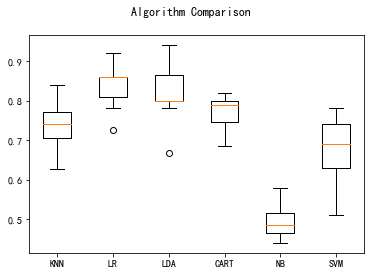

0.7014925373134329
[[ 52  38   0   0   0]
 [  1 180   0   0   0]
 [  2  17   0   0   0]
 [ 11  24   0   0   1]
 [  4   2   0   0   3]]
              precision    recall  f1-score   support

           0       0.74      0.58      0.65        90
           1       0.69      0.99      0.81       181
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        36
           4       0.75      0.33      0.46         9

    accuracy                           0.70       335
   macro avg       0.44      0.38      0.39       335
weighted avg       0.59      0.70      0.63       335

238 has been classified as  1 and should be  112


C:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
models = [] #建立列表
models.append(('KNN', KNeighborsClassifier())) #往maodels添加元组（算法名称，算法函数）
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
# seed = 7

for name, model in models: #将算法名称与函数分别读取
    kfold = model_selection.KFold(n_splits=10) #建立10倍交叉验证
    cv_results = model_selection.cross_val_score(model, X_train, Y_train.values.ravel(), cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
# Make predictions on validation dataset
# knn = KNeighborsClassifier()
# knn = KNeighborsClassifier(n_neighbors=18, weights= 'distance', algorithm='auto',
#                            leaf_size=5, p=2, metric='minkowski', metric_params=None, n_jobs=-1)#调参
# knn.fit(X_train, Y_train) #knn拟合序列集
# predictions = knn.predict(X_validation) #预测验证集

svc = SVC()
svc.fit(X_train, Y_train.values.ravel())
predictions = svc.predict(X_validation)

print(accuracy_score(Y_validation, predictions)) #验证集精度得分
print(confusion_matrix(Y_validation, predictions)) #混淆矩阵
print(classification_report(Y_validation, predictions)) #分类预测报告

# 找出分类错误的样本
errors = []
inputs = X_validation
labels = Y_validation
predictions = svc.predict(inputs)
for inputt, prediction, label in zip(inputs.index.tolist(), predictions, labels):
    if prediction != label:
        print(inputt, 'has been classified as ', prediction, 'and should be ', label) 
        errors.append(inputt)


In [18]:
# 决策树
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions)) #验证集精度得分
print(confusion_matrix(Y_validation, predictions)) #混淆矩阵
print(classification_report(Y_validation, predictions)) #分类预测报告

0.7582089552238805
[[ 65   7   5   8   5]
 [ 14 159   4   3   1]
 [  5   6   6   2   0]
 [  4   6   4  21   1]
 [  5   0   0   1   3]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        90
           1       0.89      0.88      0.89       181
           2       0.32      0.32      0.32        19
           3       0.60      0.58      0.59        36
           4       0.30      0.33      0.32         9

    accuracy                           0.76       335
   macro avg       0.56      0.57      0.56       335
weighted avg       0.76      0.76      0.76       335



Text(30.5, 0.5, 'true')

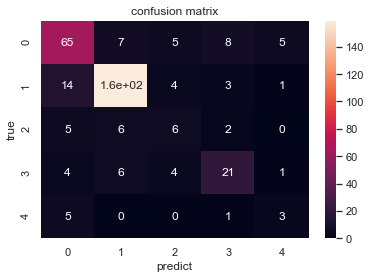

In [19]:
confusion = confusion_matrix(Y_validation,predictions) #绘制混淆矩阵


sns.set()
f,ax=plt.subplots()


sns.heatmap(confusion,annot=True,ax=ax) #画热力图

ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴

In [22]:
import pandas as pd
import numpy as np
import random
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report  #将主要分类指标以文本输出
from sklearn.metrics import confusion_matrix #计算混淆矩阵，主要来评估分类的准确性
from sklearn.metrics import accuracy_score #计算精度得分
from imblearn.over_sampling import SMOTE # 使用imlbearn库中上采样方法中的SMOTE接口
from collections import Counter # 查看所生成的样本类别分布，0和1样本比例9比1，属于类别不平衡数据
from sklearn.datasets import make_classification # 使用sklearn的make_classification生成不平衡数据样本
from imblearn.under_sampling import RandomUnderSampler # 引入随机欠采样

class EC():
    """
        EC
        Ensemble Classifier
    """
    def __init__(
                    self,
                    svm_num=1,
                    rf_num=1
                ):
        """
            Initializes the SBBTree.
            Args:
              svm_num : number of svm.
              rf_num : number of rf.
        """
        self.svm_num = svm_num
        self.rf_num = rf_num
        self.svm_model = []
        self.rf_model = []
        self.model_first = []
        self.model_second = []
        self.mistake_X_all = []
        self.mistake_y_all = [] # mistake_data

    def svm_fit(self, X, y):
        """ fit model. """
        # 按比例欠采样,test_size后序可以设置变动,使用分层采样，每次采样样本都不会重复
        self.SSS = StratifiedShuffleSplit(n_splits=self.svm_num, test_size=0.1, random_state=0)
        # 按相同数量对训练集划分以构建评估集
        # self.SK = StratifiedShuffleSplit(n_splits=self.svm_num, test_size=0.2, random_state=1)
        self.SK = StratifiedKFold(n_splits=self.svm_num, shuffle=True, random_state=0)

        for sss_split, sk_split in zip(self.SSS.split(X, y), self.SK.split(X, y)):
            train_index, test_index = sss_split[0], sss_split[1]
            sk_index, sk_val_index = sk_split[0], sk_split[1]

            # print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            sk_val_X_test = X[sk_val_index]
            sk_val_y_test = y[sk_val_index]

            # 进行过采样
            smo = SMOTE(random_state=42)
            X_smo, y_smo = smo.fit_resample(X_train, y_train)
            # print(Counter(y_smo))

            pipeline = Pipeline([
                ('Standardization', StandardScaler()),
                ('svc', SVC())
            ])

            tuned_parameters = {
                'svc__kernel': ['rbf'],  # 'sigmoid', 'precomputed', 'poly', 'linear'
                # 'svc__gamma': ['scale', 'auto'],
            }
            scores = ['f1_micro']
            for score in scores:
                # print("# Tuning hyper-parameters for %s" % score)
                svc = GridSearchCV(pipeline, tuned_parameters, scoring='%s' % score)
                svc.fit(X_smo, y_smo)
                # print("Best parameters set found on development set:")
                # print(svc.best_params_)

                self.svm_model.append(svc)

            pred_y = svc.predict(sk_val_X_test)
            index = np.arange(0, len(sk_val_y_test))
            mistake_index = index[pred_y != sk_val_y_test]

            # 找出第一阶段分类器分类错误的数据
            for i in mistake_index:
                self.mistake_X_all.extend([sk_val_X_test[i]])
                self.mistake_y_all.extend([sk_val_y_test[i]])
        return self.mistake_X_all, self.mistake_y_all


    def rf_fit(self, X, y):
        """ fit model. """
        for i in range(self.rf_num):
            X_resampled, _, y_resampled, _ = train_test_split(X, y, test_size=0.2, random_state=i)
            rf = RandomForestClassifier(n_jobs=-1)
            tuned_parameters = {
                'n_estimators': [50], # 50, 100, 200
                # 'criterion': ['gini', 'entropy'],
                # 'max_depth': [2, 5],
                # 'max_features': ['log2', 'sqrt', 'int'],
                # 'bootstrap': [True, False],
                # 'warm_start': [True, False]
            }
            scores = ['f1_micro']
            for score in scores:
                # print("# Tuning hyper-parameters for %s" % score)
                # rf = GridSearchCV(rf, tuned_parameters, cv=5, scoring='%s' % score)
                rf.fit(X_resampled, y_resampled)
                # print("Best parameters set found on development set:")
                # print(rf.best_params_)

                self.rf_model.append(rf)


    def second_fit(self, X_train, y_train):
        self.model_first = self.svm_model
        self.model_first.extend(self.rf_model)
        X_second, _, y_second, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
        test_pred = np.zeros((X_second.shape[0], len(self.model_first)))
        for sn,clf in enumerate(self.model_first):
            pred = clf.predict(X_second)
            test_pred[:, sn] = pred
        X_second = np.hstack((np.array(X_second), np.array(test_pred)))

        # 第二阶段选择随机森林
        # rf = RandomForestClassifier(n_jobs=-1)
        # tuned_parameters = {
        #     'n_estimators': [50, 100, 200],  #
        #     'criterion': ['gini', 'entropy'],
        #     # 'max_depth': [2, 5],
        #     # 'max_features': ['log2', 'sqrt', 'int'],
        #     # 'bootstrap': [True, False],
        #     # 'warm_start': [True, False]
        # }
        # scores = ['f1_micro']
        # for score in scores:
        #     # print("# Tuning hyper-parameters for %s" % score)
        #     rf = GridSearchCV(rf, tuned_parameters, scoring='%s' % score)
        #     rf.fit(X_second, y_second)
        #     # print("Best parameters set found on development set:")
        #     # print(rf.best_params_)
        #     self.model_second.append(rf)
        pipeline = Pipeline([
            ('Standardization', StandardScaler()),
            ('svc', SVC())
        ])
        pipeline.fit(X_second, y_second)
        self.model_second.append(pipeline)

    def model_test(self, X_test):
        """ predict test data. """
        test_pred = np.zeros((X_test.shape[0], len(self.model_first)))
        for sn, clf in enumerate(self.model_first):
            pred = clf.predict(X_test)
            test_pred[:, sn] = pred
        X_test = np.hstack((np.array(X_test), np.array(test_pred)))

        for clf in self.model_second:
            return clf.predict(X_test)



    def pred(self, y_test, predictions):
        predictions = np.rint(predictions)
        print(accuracy_score(y_test, predictions))  # 验证集精度得分
        print(confusion_matrix(y_test, predictions))  # 混淆矩阵
        print(classification_report(y_test, predictions))  # 分类预测报告

    def model_adaboost(self, X_train, y_train, X_test):
        clf = AdaBoostClassifier(n_estimators=10)
        clf = clf.fit(X_train, y_train)
        return clf.predict(X_test)

    def model_svm(self, X_train, y_train, X_test):
        pipeline = Pipeline([
            ('Standardization', StandardScaler()),
            ('svc', SVC())
        ])
        pipeline.fit(X_train, y_train)
        return pipeline.predict(X_test)

    def model_randomforest(self, X_train, y_train, X_test):
        clf = RandomForestClassifier(n_estimators=10, max_depth=3, min_samples_split=12, random_state=0)
        clf = clf.fit(X_train, y_train)
        return clf.predict(X_test)

    def model_xgboost(self, X_train, y_train, X_test1, y_test1):

        X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4, random_state=0, stratify=y_train)
        clf = xgboost
        train_matrix = clf.DMatrix(X_train, label=y_train, missing=-1, silent=True)
        test_matrix = clf.DMatrix(X_test, label=y_test, missing=-1, silent=True)
        z = clf.DMatrix(X_test1, label=y_test1, missing=-1, silent=True)
        params = {'booster': 'gbtree',
                  'objective': 'multi:softprob',
                  'n_estimators': 100,
                  'eval_metric': 'mlogloss',
                  'gamma': 1,
                  'min_child_weight': 1.5,
                  'max_depth': 3,
                  'lambda': 100,
                  'subsample': 0.7,
                  'colsample_bytree': 0.7,
                  'colsample_bylevel': 0.7,
                  'eta': 0.03,
                  'tree_method': 'exact',
                  'seed': 2017,
                  "num_class": 5
                  }

        num_round = 10000
        early_stopping_rounds = 100
        watchlist = [(train_matrix, 'train'),
                     (test_matrix, 'eval')
                     ]

        model = clf.train(params,
                          train_matrix,
                          num_boost_round=num_round,
                          evals=watchlist,
                          early_stopping_rounds=early_stopping_rounds,
                          verbose_eval=2000
                          )
        pre = model.predict(z, ntree_limit=model.best_ntree_limit)
        return pre


"""
    TEST CODE
"""
from sklearn.datasets import make_classification
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_gaussian_quantiles
from sklearn import metrics
from sklearn.metrics import f1_score
# X, y = make_classification(n_samples=31200, n_features=25, n_classes=3, weights=[0.3, 0.67, 0.03],\
#                            n_redundant=20, n_clusters_per_class=2, n_informative=4, random_state=1)
# # X, y = make_gaussian_quantiles(mean=None, cov=1.0, n_samples=1000, n_features=50, n_classes=2, shuffle=True, random_state=2)
# # data = load_breast_cancer()
# # X, y = data.data, data.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)
data = pd.read_csv('D:\\data\\挖掘运输热点数据\\6.29新的分类数据\\train_and_all处理后的训练数据.csv')
X = data.drop(['112'], axis = 1)
X = data.drop(['0'], axis = 1)
y = data['112']
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)

# test 1
import warnings
warnings.filterwarnings('ignore')

print("集成学习模型")
model = EC(svm_num=2, rf_num=1)
mistake_X_all, mistake_y_all = model.svm_fit(X_train, y_train)
model.rf_fit(mistake_X_all, mistake_y_all)
model.second_fit(X_train, y_train)
pred0=model.model_test(X_test)
model.pred(y_test, pred0)

print("adaboost模型")
model = EC()
pred = model.model_adaboost(X_train, y_train, X_test)
model.pred(y_test, pred)

print("svm模型")
model = EC()
pred = model.model_svm(X_train, y_train, X_test)
model.pred(y_test, pred)

print("随机森林模型")
model = EC()
pred = model.model_randomforest(X_train, y_train, X_test)
model.pred(y_test, pred)

print("xgboost模型")
model = EC()
pred = model.model_xgboost(X_train,  y_train, X_test, y_test)
pred = np.argmax(pred, axis = 1)
model.pred(y_test, pred)

# # test 1
print("++++++++++++++")
model = EC(svm_num=10, rf_num=10)
mistake_X_all, mistake_y_all = model.svm_fit(X_train, y_train)
model.rf_fit(mistake_X_all, mistake_y_all)
model.second_fit(X_train, y_train)
pred1=model.model_test(X_test)
model.pred(y_test, pred1)
#
# # test 2
print("----------------------")
print("集成学习模型")
model = EC(svm_num=60, rf_num=15)
mistake_X_all, mistake_y_all = model.svm_fit(X_train, y_train)
model.rf_fit(mistake_X_all, mistake_y_all)
model.second_fit(X_train, y_train)
pred1=model.model_test(X_test)
model.pred(y_test, pred1)
#
# # test 3
# print("------------------------")
# model = EC(svm_num=80, rf_num=20)
# mistake_X_all, mistake_y_all = model.svm_fit(X_train, y_train)
# model.rf_fit(mistake_X_all, mistake_y_all)
# model.second_fit(X_train, y_train)
# pred2=model.model_test(X_test)
# model.pred(y_test, pred2)
#
# # test 4
# model = EC(svm_num=80, rf_num=10)
# mistake_X_all, mistake_y_all = model.svm_fit(X_train, y_train)
# model.rf_fit(mistake_X_all, mistake_y_all)
# model.second_fit(X_train, y_train)
# pred3=model.model_test(X_test)
# model.pred(y_test, pred3)




# fpr, tpr, thresholds = metrics.roc_curve(y_test+1, pred1, pos_label=2)
# print('auc: ',metrics.auc(fpr, tpr))
#
# fpr, tpr, thresholds = metrics.roc_curve(y_test+1, pred2, pos_label=2)
# print('auc: ',metrics.auc(fpr, tpr))
#
# fpr, tpr, thresholds = metrics.roc_curve(y_test+1, pred3, pos_label=2)
# print('auc: ',metrics.auc(fpr, tpr))
#
# fpr, tpr, thresholds = metrics.roc_curve(y_test+1, pred4, pos_label=2)
# print('auc: ',metrics.auc(fpr, tpr))


# auc:  0.7281621243885396
# auc:  0.7710471146419509
# auc:  0.7894369046305492
# auc:  0.8084519474787597

集成学习模型
0.8274111675126904
[[ 42   7   0   0   0]
 [  3 112   0   0   0]
 [  1   6   3   1   0]
 [  6   6   1   6   0]
 [  2   1   0   0   0]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        49
           1       0.85      0.97      0.91       115
           2       0.75      0.27      0.40        11
           3       0.86      0.32      0.46        19
           4       0.00      0.00      0.00         3

    accuracy                           0.83       197
   macro avg       0.65      0.48      0.52       197
weighted avg       0.81      0.83      0.80       197

adaboost模型
0.8477157360406091
[[ 49   0   0   0   0]
 [  0 115   0   0   0]
 [  0  11   0   0   0]
 [  0  19   0   0   0]
 [  0   0   0   0   3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.79      1.00      0.88       115
           2       0.00      0.00      0.00        11
      

### 消融实验
- 去掉停留时长分布(1-17){左右端点均包括}
- 去掉停留时段分布(18-41)
- 去掉不同时段的停留频次分布(42-53)
- 去掉停留点业务类型分布(54-55)
- 去掉该区域临近道路类型(56->改为one-hot编码)
- 去掉邻近POI类型分布(57-107)
- 去掉停留区面积(108)
- 去掉最后三列(109-111)

In [53]:
data.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,motorway,primary,residential,secondary,service,tertiary,trunk,unclassified
0,P000021035,0.24,0.313333,0.2,0.12,0.02,0.026667,0.006667,0.013333,0.013333,0.026667,0.006667,0.0,0.013333,0.088733,0.032986,0.063137,0.251272,0.026667,0.033333,0.026667,0.026667,0.026667,0.04,0.04,0.046667,0.026667,0.046667,0.073333,0.053333,0.066667,0.046667,0.04,0.073333,0.04,0.053333,0.06,0.046667,0.033333,0.02,0.013333,0.04,0.034483,0.034483,0.034483,0.086207,0.12069,0.068966,0.189655,0.086207,0.12069,0.068966,0.051724,0.103448,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0.005784,0.465517,1.896552,0.293103,1,0,0,0,0,0,0,0,1


In [58]:
data_1 = data
X = data_1.drop(['112'], axis = 1)
X = data_1.drop(['0'], axis = 1)
y = data_1['112']
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)
print("svm模型")
model = EC()
pred = model.model_svm(X_train, y_train, X_test)
model.pred(y_test, pred)


svm模型
0.8324873096446701
[[ 42   7   0   0   0]
 [  3 112   0   0   0]
 [  0   6   4   1   0]
 [  3   8   2   6   0]
 [  1   2   0   0   0]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        49
           1       0.83      0.97      0.90       115
           2       0.67      0.36      0.47        11
           3       0.86      0.32      0.46        19
           4       0.00      0.00      0.00         3

    accuracy                           0.83       197
   macro avg       0.64      0.50      0.54       197
weighted avg       0.82      0.83      0.81       197



In [22]:
# 去掉停留时长分布
data = pd.read_csv('D:\\data\\挖掘运输热点数据\\6.29新的分类数据\\train_and_all处理后的训练数据.csv')
del_first = [1, 18, 42, 54, 57, 108 , 109]
del_end = [17, 41, 53, 55, 107, 108, 111]
state = ['去掉停留时长分布(1-17){左右端点均包括}','去掉停留时段分布(18-41)','去掉不同时段的停留频次分布(42-53)',\
         '去掉停留点业务类型分布(54-55)','去掉邻近POI类型分布(57-107)',\
         '去掉停留区面积(108)','去掉最后三列(109-111)']
state_num = 0
for first, end in zip(del_first, del_end):
    data_1 = data.drop(labels=[str(i) for i in range(first,end+1)], axis=1)
    X = data_1.drop(['112'], axis = 1)
    X = data_1.drop(['0'], axis = 1)
    y = data_1['112']
    X = X.values
    y = y.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)
#     print("集成学习模型")
#     model = EC(svm_num=2, rf_num=1)
#     mistake_X_all, mistake_y_all = model.svm_fit(X_train, y_train)
#     model.rf_fit(mistake_X_all, mistake_y_all)
#     model.second_fit(X_train, y_train)
#     pred0=model.model_test(X_test)
#     model.pred(y_test, pred0)

#     print("adaboost模型")
#     model = EC()
#     pred = model.model_adaboost(X_train, y_train, X_test)
#     model.pred(y_test, pred)
    print(state[state_num])
    state_num += 1
    print("svm模型")
    model = EC()
    pred = model.model_svm(X_train, y_train, X_test)
    model.pred(y_test, pred)

#     print("随机森林模型")
#     model = EC()
#     pred = model.model_randomforest(X_train, y_train, X_test)
#     model.pred(y_test, pred)
    print("######################################################")
    
data_1 = data.drop(labels=['motorway','primary','residential','secondary','service','tertiary','trunk','unclassified'], axis=1)
X = data_1.drop(['112'], axis = 1)
X = data_1.drop(['0'], axis = 1)
y = data['112']
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)
print('去掉该区域临近道路类型(56->改为one-hot编码)')
print("svm模型")
model = EC()
pred = model.model_svm(X_train, y_train, X_test)
model.pred(y_test, pred)

去掉停留时长分布(1-17){左右端点均包括}
svm模型
0.8730964467005076
[[ 43   6   0   0   0]
 [  1 114   0   0   0]
 [  0   5   5   1   0]
 [  0   8   1  10   0]
 [  0   0   0   3   0]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.92        49
           1       0.86      0.99      0.92       115
           2       0.83      0.45      0.59        11
           3       0.71      0.53      0.61        19
           4       0.00      0.00      0.00         3

    accuracy                           0.87       197
   macro avg       0.68      0.57      0.61       197
weighted avg       0.86      0.87      0.86       197

######################################################
去掉停留时段分布(18-41)
svm模型
0.8477157360406091
[[ 42   7   0   0   0]
 [  2 113   0   0   0]
 [  0   7   4   0   0]
 [  3   5   3   8   0]
 [  1   0   0   2   0]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        49
           1       0.86  

### 集成学习模型
- svm_num=2, rf_num=1
- svm_num=60, rf_num=10
- svm_num=80, rf_num=10

In [23]:
# 去掉停留时长分布
data = pd.read_csv('D:\\data\\挖掘运输热点数据\\6.29新的分类数据\\train_and_all处理后的训练数据.csv')
del_first = [1, 18, 42, 54, 57, 108 , 109]
del_end = [17, 41, 53, 55, 107, 108, 111]
state = ['去掉停留时长分布(1-17){左右端点均包括}','去掉停留时段分布(18-41)','去掉不同时段的停留频次分布(42-53)',\
         '去掉停留点业务类型分布(54-55)','去掉邻近POI类型分布(57-107)',\
         '去掉停留区面积(108)','去掉最后三列(109-111)']
state_num = 0
for first, end in zip(del_first, del_end):
    data_1 = data.drop(labels=[str(i) for i in range(first,end+1)], axis=1)
    X = data_1.drop(['112'], axis = 1)
    X = data_1.drop(['0'], axis = 1)
    y = data_1['112']
    X = X.values
    y = y.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)
    print(state[state_num])
    state_num += 1
    print("集成学习模型")
    model = EC(svm_num=2, rf_num=1)
    mistake_X_all, mistake_y_all = model.svm_fit(X_train, y_train)
    model.rf_fit(mistake_X_all, mistake_y_all)
    model.second_fit(X_train, y_train)
    pred0=model.model_test(X_test)
    model.pred(y_test, pred0)
    print("######################################################")
    
data_1 = data.drop(labels=['motorway','primary','residential','secondary','service','tertiary','trunk','unclassified'], axis=1)
X = data_1.drop(['112'], axis = 1)
X = data_1.drop(['0'], axis = 1)
y = data['112']
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)
print('去掉该区域临近道路类型(56->改为one-hot编码)')
print("集成学习模型")
model = EC(svm_num=2, rf_num=1)
mistake_X_all, mistake_y_all = model.svm_fit(X_train, y_train)
model.rf_fit(mistake_X_all, mistake_y_all)
model.second_fit(X_train, y_train)
pred0=model.model_test(X_test)
model.pred(y_test, pred0)

去掉停留时长分布(1-17){左右端点均包括}
集成学习模型
0.8426395939086294
[[ 41   8   0   0   0]
 [  3 112   0   0   0]
 [  0   6   4   1   0]
 [  2   7   1   9   0]
 [  0   1   0   2   0]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        49
           1       0.84      0.97      0.90       115
           2       0.80      0.36      0.50        11
           3       0.75      0.47      0.58        19
           4       0.00      0.00      0.00         3

    accuracy                           0.84       197
   macro avg       0.66      0.53      0.57       197
weighted avg       0.83      0.84      0.82       197

######################################################
去掉停留时段分布(18-41)
集成学习模型
0.8578680203045685
[[ 41   8   0   0   0]
 [  3 112   0   0   0]
 [  0   6   5   0   0]
 [  3   3   2  11   0]
 [  1   1   0   1   0]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        49
           1       0.86

In [65]:
# 去掉停留时长分布
data = pd.read_csv('D:\\data\\挖掘运输热点数据\\6.29新的分类数据\\train_and_all处理后的训练数据.csv')
del_first = [1, 18, 42, 54, 57, 108 , 109]
del_end = [17, 41, 53, 55, 107, 108, 111]
state = ['去掉停留时长分布(1-17){左右端点均包括}','去掉停留时段分布(18-41)','去掉不同时段的停留频次分布(42-53)',\
         '去掉停留点业务类型分布(54-55)','去掉邻近POI类型分布(57-107)',\
         '去掉停留区面积(108)','去掉最后三列(109-111)']
state_num = 0
for first, end in zip(del_first, del_end):
    data_1 = data.drop(labels=[str(i) for i in range(first,end+1)], axis=1)
    X = data_1.drop(['112'], axis = 1)
    X = data_1.drop(['0'], axis = 1)
    y = data_1['112']
    X = X.values
    y = y.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)
    print(state[state_num])
    state_num += 1
    print("集成学习模型")
    model = EC(svm_num=60, rf_num=10)
    mistake_X_all, mistake_y_all = model.svm_fit(X_train, y_train)
    model.rf_fit(mistake_X_all, mistake_y_all)
    model.second_fit(X_train, y_train)
    pred0=model.model_test(X_test)
    model.pred(y_test, pred0)
    print("######################################################")
    
data_1 = data.drop(labels=['motorway','primary','residential','secondary','service','tertiary','trunk','unclassified'], axis=1)
X = data_1.drop(['112'], axis = 1)
X = data_1.drop(['0'], axis = 1)
y = data['112']
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)
print('去掉该区域临近道路类型(56->改为one-hot编码)')
print("集成学习模型")
model = EC(svm_num=60, rf_num=10)
mistake_X_all, mistake_y_all = model.svm_fit(X_train, y_train)
model.rf_fit(mistake_X_all, mistake_y_all)
model.second_fit(X_train, y_train)
pred0=model.model_test(X_test)
model.pred(y_test, pred0)

去掉停留时长分布(1-17){左右端点均包括}
集成学习模型
0.8477157360406091
[[ 42   7   0   0   0]
 [  5 109   1   0   0]
 [  1   3   7   0   0]
 [  3   5   2   9   0]
 [  1   0   2   0   0]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        49
           1       0.88      0.95      0.91       115
           2       0.58      0.64      0.61        11
           3       1.00      0.47      0.64        19
           4       0.00      0.00      0.00         3

    accuracy                           0.85       197
   macro avg       0.65      0.58      0.60       197
weighted avg       0.84      0.85      0.84       197

######################################################
去掉停留时段分布(18-41)
集成学习模型
0.883248730964467
[[ 44   5   0   0   0]
 [  4 109   2   0   0]
 [  0   2   9   0   0]
 [  2   3   1  11   2]
 [  0   0   1   1   1]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        49
           1       0.92 

In [66]:
# 去掉停留时长分布
data = pd.read_csv('D:\\data\\挖掘运输热点数据\\6.29新的分类数据\\train_and_all处理后的训练数据.csv')
del_first = [1, 18, 42, 54, 57, 108 , 109]
del_end = [17, 41, 53, 55, 107, 108, 111]
state = ['去掉停留时长分布(1-17){左右端点均包括}','去掉停留时段分布(18-41)','去掉不同时段的停留频次分布(42-53)',\
         '去掉停留点业务类型分布(54-55)','去掉邻近POI类型分布(57-107)',\
         '去掉停留区面积(108)','去掉最后三列(109-111)']
state_num = 0
for first, end in zip(del_first, del_end):
    data_1 = data.drop(labels=[str(i) for i in range(first,end+1)], axis=1)
    X = data_1.drop(['112'], axis = 1)
    X = data_1.drop(['0'], axis = 1)
    y = data_1['112']
    X = X.values
    y = y.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)
    print(state[state_num])
    state_num += 1
    print("集成学习模型")
    model = EC(svm_num=60, rf_num=30)
    mistake_X_all, mistake_y_all = model.svm_fit(X_train, y_train)
    model.rf_fit(mistake_X_all, mistake_y_all)
    model.second_fit(X_train, y_train)
    pred0=model.model_test(X_test)
    model.pred(y_test, pred0)
    print("######################################################")
    
data_1 = data.drop(labels=['motorway','primary','residential','secondary','service','tertiary','trunk','unclassified'], axis=1)
X = data_1.drop(['112'], axis = 1)
X = data_1.drop(['0'], axis = 1)
y = data['112']
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)
print('去掉该区域临近道路类型(56->改为one-hot编码)')
print("集成学习模型")
model = EC(svm_num=60, rf_num=30)
mistake_X_all, mistake_y_all = model.svm_fit(X_train, y_train)
model.rf_fit(mistake_X_all, mistake_y_all)
model.second_fit(X_train, y_train)
pred0=model.model_test(X_test)
model.pred(y_test, pred0)

去掉停留时长分布(1-17){左右端点均包括}
集成学习模型
0.8527918781725888
[[ 42   7   0   0   0]
 [  5 110   0   0   0]
 [  1   3   7   0   0]
 [  2   6   2   9   0]
 [  0   1   1   1   0]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        49
           1       0.87      0.96      0.91       115
           2       0.70      0.64      0.67        11
           3       0.90      0.47      0.62        19
           4       0.00      0.00      0.00         3

    accuracy                           0.85       197
   macro avg       0.66      0.58      0.61       197
weighted avg       0.84      0.85      0.84       197

######################################################
去掉停留时段分布(18-41)
集成学习模型
0.8781725888324873
[[ 45   4   0   0   0]
 [  4 109   2   0   0]
 [  0   2   9   0   0]
 [  3   3   2   9   2]
 [  0   0   1   1   1]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        49
           1       0.92

### xgboost

In [23]:
# 去掉停留时长分布
data = pd.read_csv('D:\\data\\挖掘运输热点数据\\6.29新的分类数据\\train_and_all处理后的训练数据.csv')
del_first = [1, 18, 42, 54, 57, 108 , 109]
del_end = [17, 41, 53, 55, 107, 108, 111]
state = ['去掉停留时长分布(1-17){左右端点均包括}','去掉停留时段分布(18-41)','去掉不同时段的停留频次分布(42-53)',\
         '去掉停留点业务类型分布(54-55)','去掉邻近POI类型分布(57-107)',\
         '去掉停留区面积(108)','去掉最后三列(109-111)']
state_num = 0
for first, end in zip(del_first, del_end):
    data_1 = data.drop(labels=[str(i) for i in range(first,end+1)], axis=1)
    X = data_1.drop(['112'], axis = 1)
    X = data_1.drop(['0'], axis = 1)
    y = data_1['112']
    X = X.values
    y = y.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)
    print(state[state_num])
    state_num += 1
    print("xgboost模型")
    model = EC()
    pred = model.model_xgboost(X_train,  y_train, X_test, y_test)
    pred = np.argmax(pred, axis = 1)
    model.pred(y_test, pred)
    print("######################################################")
    
data_1 = data.drop(labels=['motorway','primary','residential','secondary','service','tertiary','trunk','unclassified'], axis=1)
X = data_1.drop(['112'], axis = 1)
X = data_1.drop(['0'], axis = 1)
y = data['112']
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)
print('去掉该区域临近道路类型(56->改为one-hot编码)')
print("xgboost模型")
model = EC()
pred = model.model_xgboost(X_train,  y_train, X_test, y_test)
pred = np.argmax(pred, axis = 1)
model.pred(y_test, pred)

去掉停留时长分布(1-17){左右端点均包括}
xgboost模型
[09:32:51] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mlogloss:1.59659	eval-mlogloss:1.59683
[2000]	train-mlogloss:0.27787	eval-mlogloss:0.28416
[2944]	train-mlogloss:0.27546	eval-mlogloss:0.28157
0.9543147208121827
[[ 49   0   0   0   0]
 [  0 115   0   0   0]
 [  0   6   5   0   0]
 [  0   0   0  19   0]
 [  0   0   0   3   0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.95      1.00      0.97       115
           2       1.00      0.45      0.62        11
           3       0.86      1.00      0.93        19
           4       0.00      0.00      0.00         3

    accuracy        

[2000]	train-mlogloss:0.27763	eval-mlogloss:0.28445
[3835]	train-mlogloss:0.27399	eval-mlogloss:0.28050
0.949238578680203
[[ 49   0   0   0   0]
 [  0 115   0   0   0]
 [  0   6   5   0   0]
 [  0   1   0  18   0]
 [  0   1   0   2   0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.93      1.00      0.97       115
           2       1.00      0.45      0.62        11
           3       0.90      0.95      0.92        19
           4       0.00      0.00      0.00         3

    accuracy                           0.95       197
   macro avg       0.77      0.68      0.70       197
weighted avg       0.94      0.95      0.94       197

